Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve


## Exploratory Data Analysis and Visualization

In [96]:
data_orig=pd.read_excel("Raisin_Dataset.xlsx")
data=data_orig.copy()
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [98]:
data["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


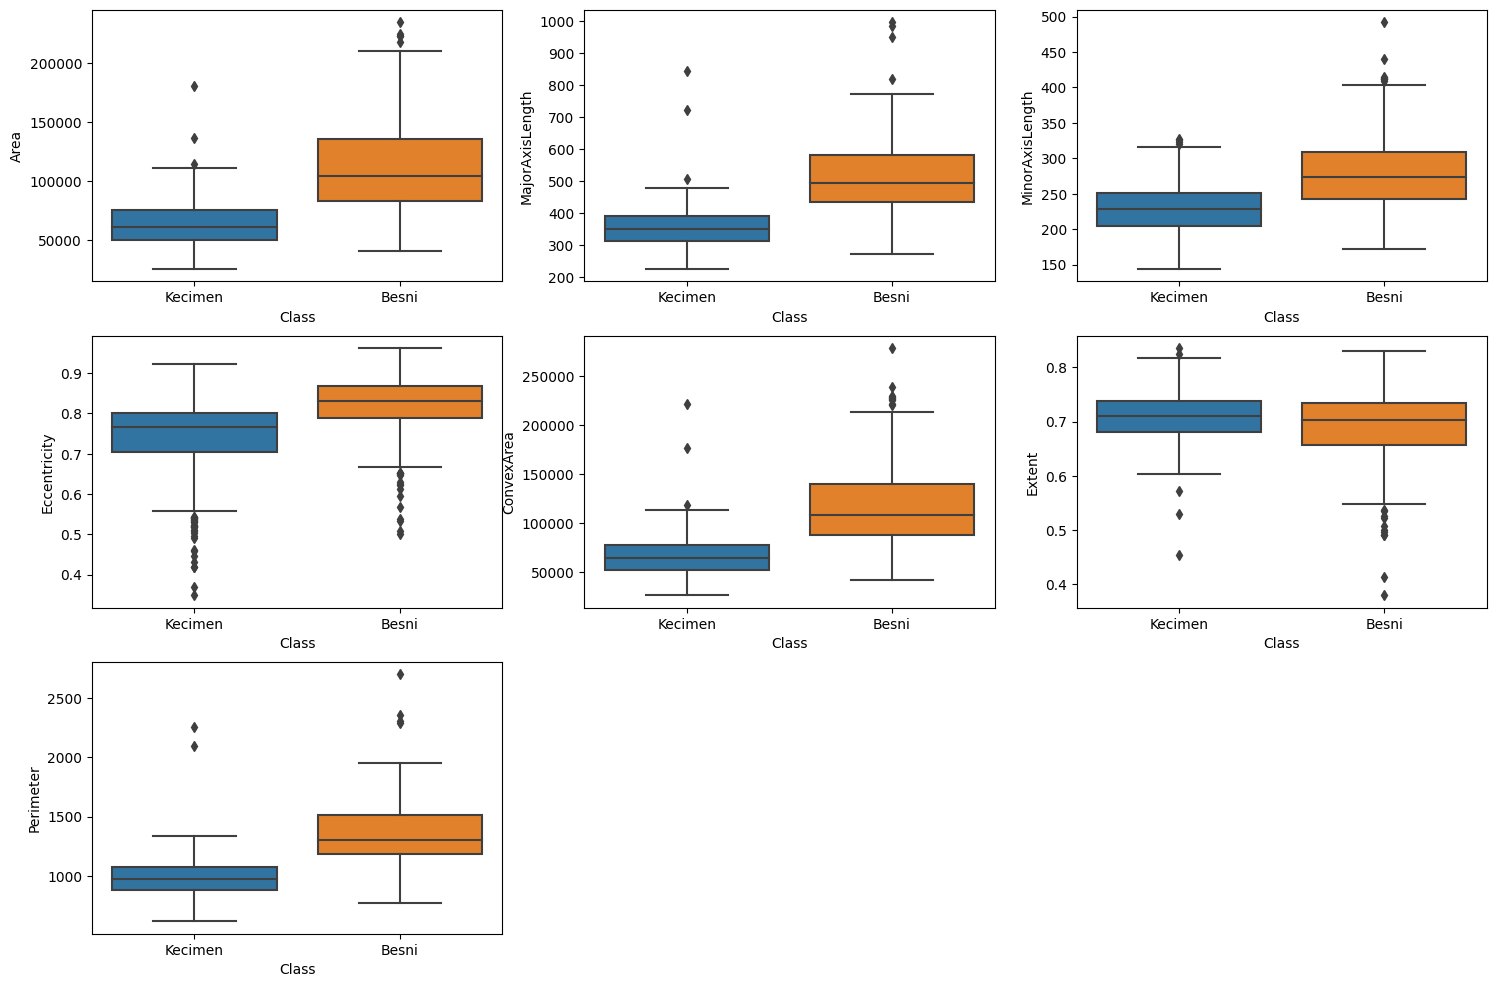

In [100]:
plt.figure(figsize=(18,12))
index=0
for column_name in data.columns[:-1]:
    index+=1
    plt.subplot(3,3,index)
    sns.boxplot(data=data, x="Class", y=column_name)

In [101]:
data.iloc[:,:-1].iplot(kind="box")

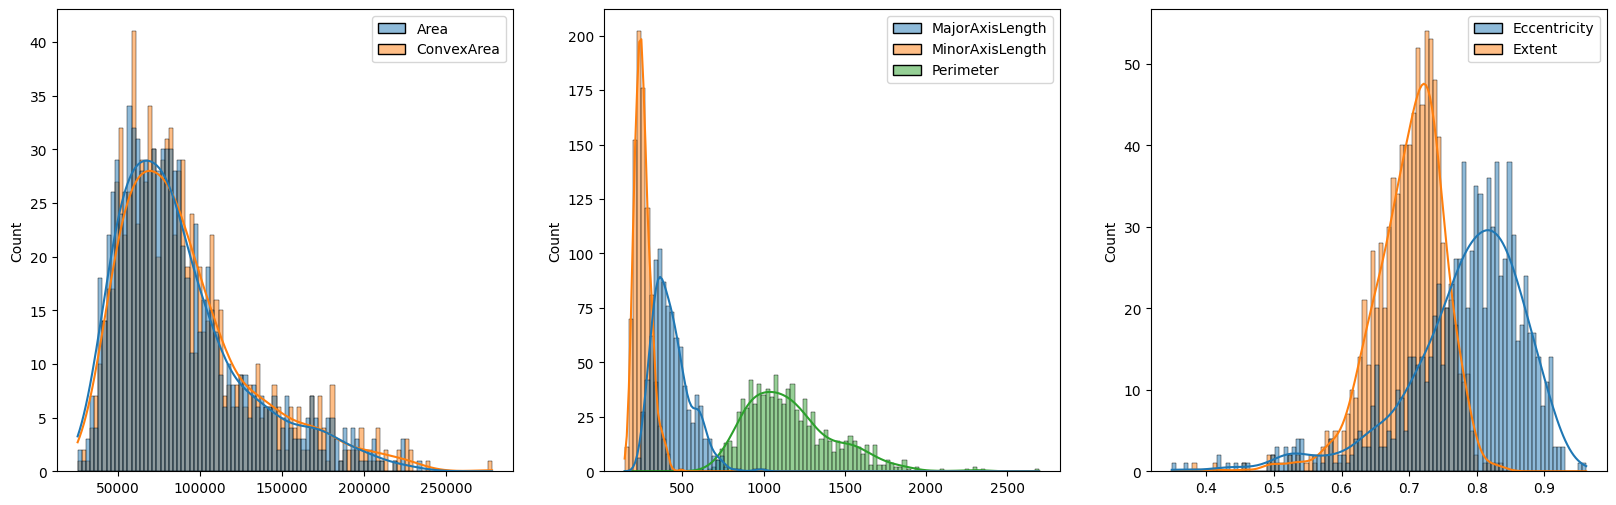

In [102]:
data2=data.drop(["Eccentricity", "Extent", "MinorAxisLength", "MajorAxisLength", "Perimeter"], axis=1)
data3=data.drop(["ConvexArea", "Area", "Eccentricity", "Extent"], axis=1)
data4=data.drop(["ConvexArea", "Area", "MinorAxisLength", "MajorAxisLength", "Perimeter"], axis=1)
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.histplot(data2,bins=100, kde=True)
plt.subplot(1,3,2)
sns.histplot(data3, bins=100, kde=True)
plt.subplot(1,3,3)
sns.histplot(data4,bins=100, kde=True);

In [103]:
data.iplot(kind="bar") # Eccentricity and Extent are not distinctive features

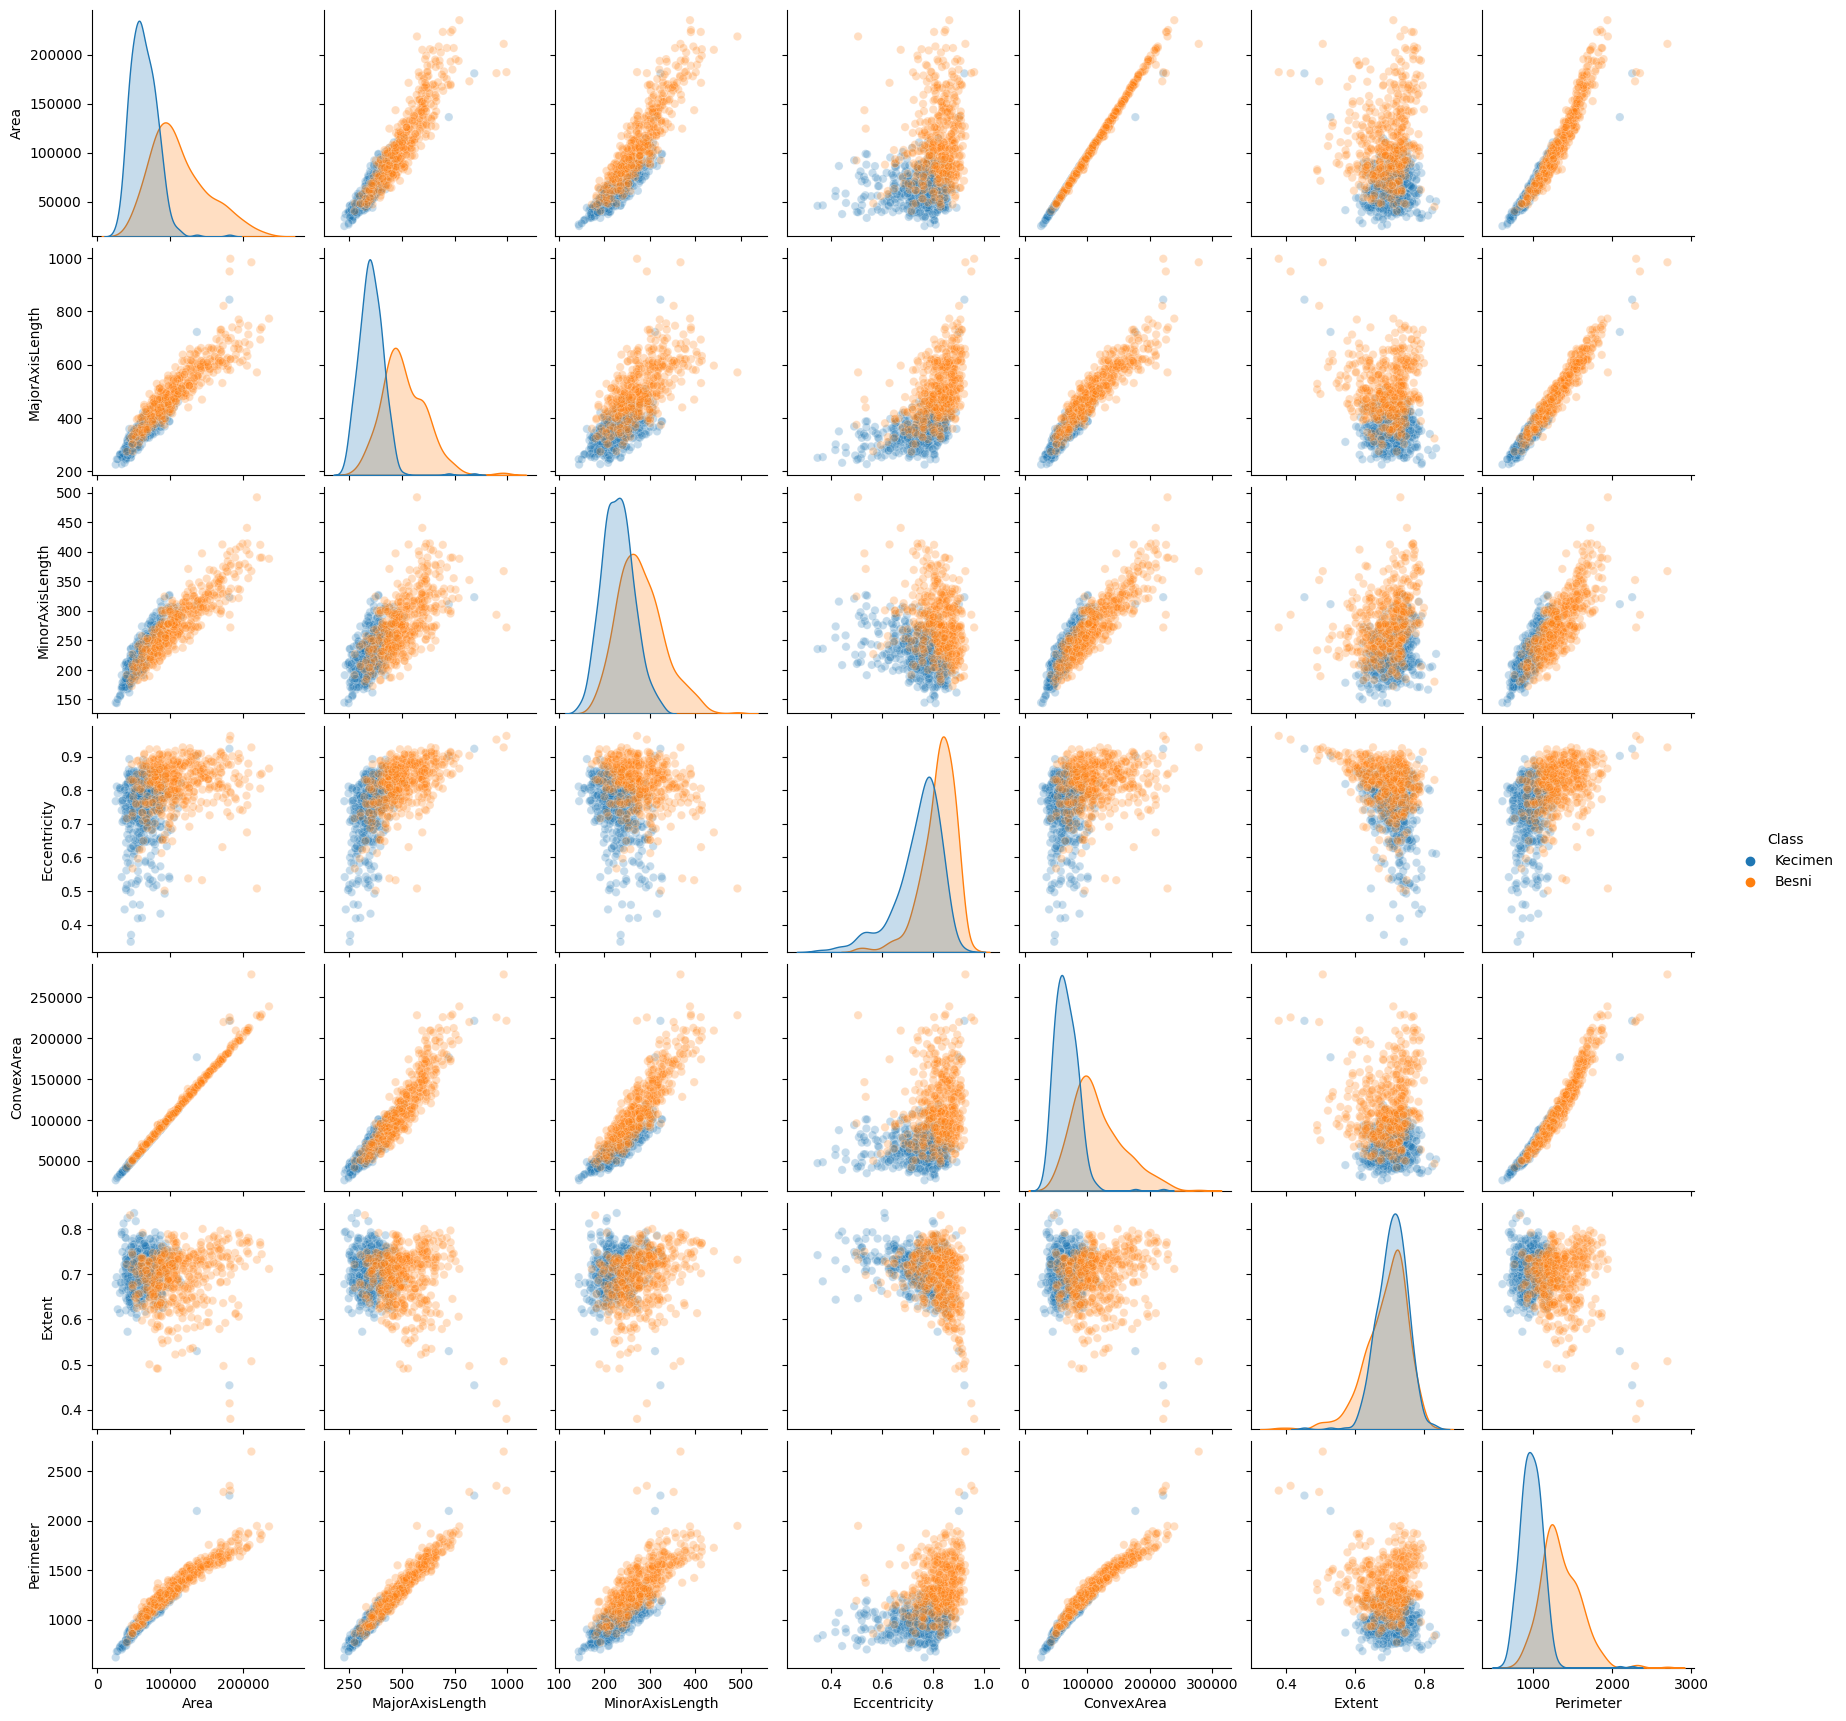

In [104]:
sns.pairplot(data=data, hue="Class", plot_kws={"alpha":0.25});

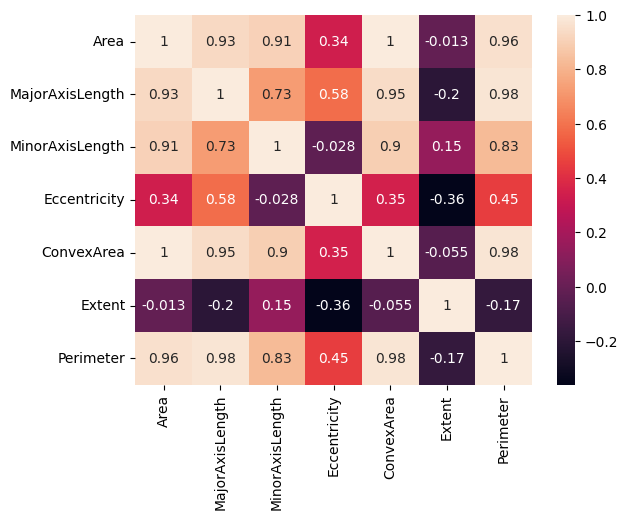

In [105]:
sns.heatmap(data.corr(numeric_only=True), annot=True);

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True #False selected since the model performance affected negatively
    * random_state: 10    
* Used StandardScaler and RobustScaler to scale and compare.

In [106]:
X=data.drop(["Class"], axis=1)
y=data["Class"]

In [107]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [108]:
print(len(y_train))
print(len(y_test))

720
180


In [109]:
# cv function requires 0 and 1 for classes
y_train_01=pd.Series(y_train).replace({"Kecimen":0,"Besni":1})
print(y_train_01)
y_test_01=pd.Series(y_test).replace({"Kecimen":0,"Besni":1})
print(y_test_01)

722    1
500    1
403    0
163    0
579    1
      ..
369    0
320    0
527    1
125    0
265    0
Name: Class, Length: 720, dtype: int64
437    0
131    0
633    1
195    0
230    0
      ..
191    0
752    1
94     0
773    1
57     0
Name: Class, Length: 180, dtype: int64


##### Scaling with StandardScaler and RobustScaler (for comparison)

In [110]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,720.0,88668.562500,39349.113444,25387.000000,59873.000000,79079.000000,105953.500000,225043.000000
MajorAxisLength,720.0,433.313454,117.365156,225.629541,345.833266,410.810006,497.700850,997.291941
MinorAxisLength,720.0,255.491716,50.525421,143.710872,220.484922,248.514089,281.447865,492.275279
Eccentricity,720.0,0.781928,0.090680,0.348730,0.740441,0.800085,0.844006,0.962124
ConvexArea,720.0,92087.719444,41184.020830,26139.000000,62056.000000,82361.000000,109383.750000,278217.000000
Extent,720.0,0.699979,0.053332,0.379856,0.671283,0.708165,0.734770,0.835455
Perimeter,720.0,1171.500365,276.692097,619.074000,970.381250,1130.400000,1316.516250,2697.753000


In [111]:
scaler_std = StandardScaler()

X_train_stdscaled=scaler_std.fit_transform(X_train)
pd.DataFrame(X_train_stdscaled).describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
0,720.0,0.0,1.001,-1.609,-0.732,-0.244,0.440,3.468
1,720.0,0.0,1.001,-1.771,-0.746,-0.192,0.549,4.809
2,720.0,0.0,1.001,-2.214,-0.693,-0.138,0.514,4.690
3,720.0,-0.0,1.001,-4.781,-0.458,0.200,0.685,1.989
4,720.0,-0.0,1.001,-1.602,-0.730,-0.236,0.420,4.523
5,720.0,0.0,1.001,-6.007,-0.538,0.154,0.653,2.542
6,720.0,0.0,1.001,-1.998,-0.727,-0.149,0.524,5.520


In [112]:
scaler_rob = RobustScaler()

X_train_robscaled=scaler_rob.fit_transform(X_train)
pd.DataFrame(X_train_robscaled).describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
0,720.0,0.208,0.854,-1.165,-0.417,0.0,0.583,3.168
1,720.0,0.148,0.773,-1.219,-0.428,0.0,0.572,3.862
2,720.0,0.114,0.829,-1.719,-0.460,0.0,0.540,3.999
3,720.0,-0.175,0.876,-4.358,-0.576,0.0,0.424,1.565
4,720.0,0.206,0.870,-1.188,-0.429,0.0,0.571,4.138
5,720.0,-0.129,0.840,-5.171,-0.581,0.0,0.419,2.005
6,720.0,0.119,0.799,-1.477,-0.462,-0.0,0.538,4.528


Axes(0.125,0.11;0.227941x0.77)
Axes(0.398529,0.11;0.227941x0.77)
Axes(0.672059,0.11;0.227941x0.77)


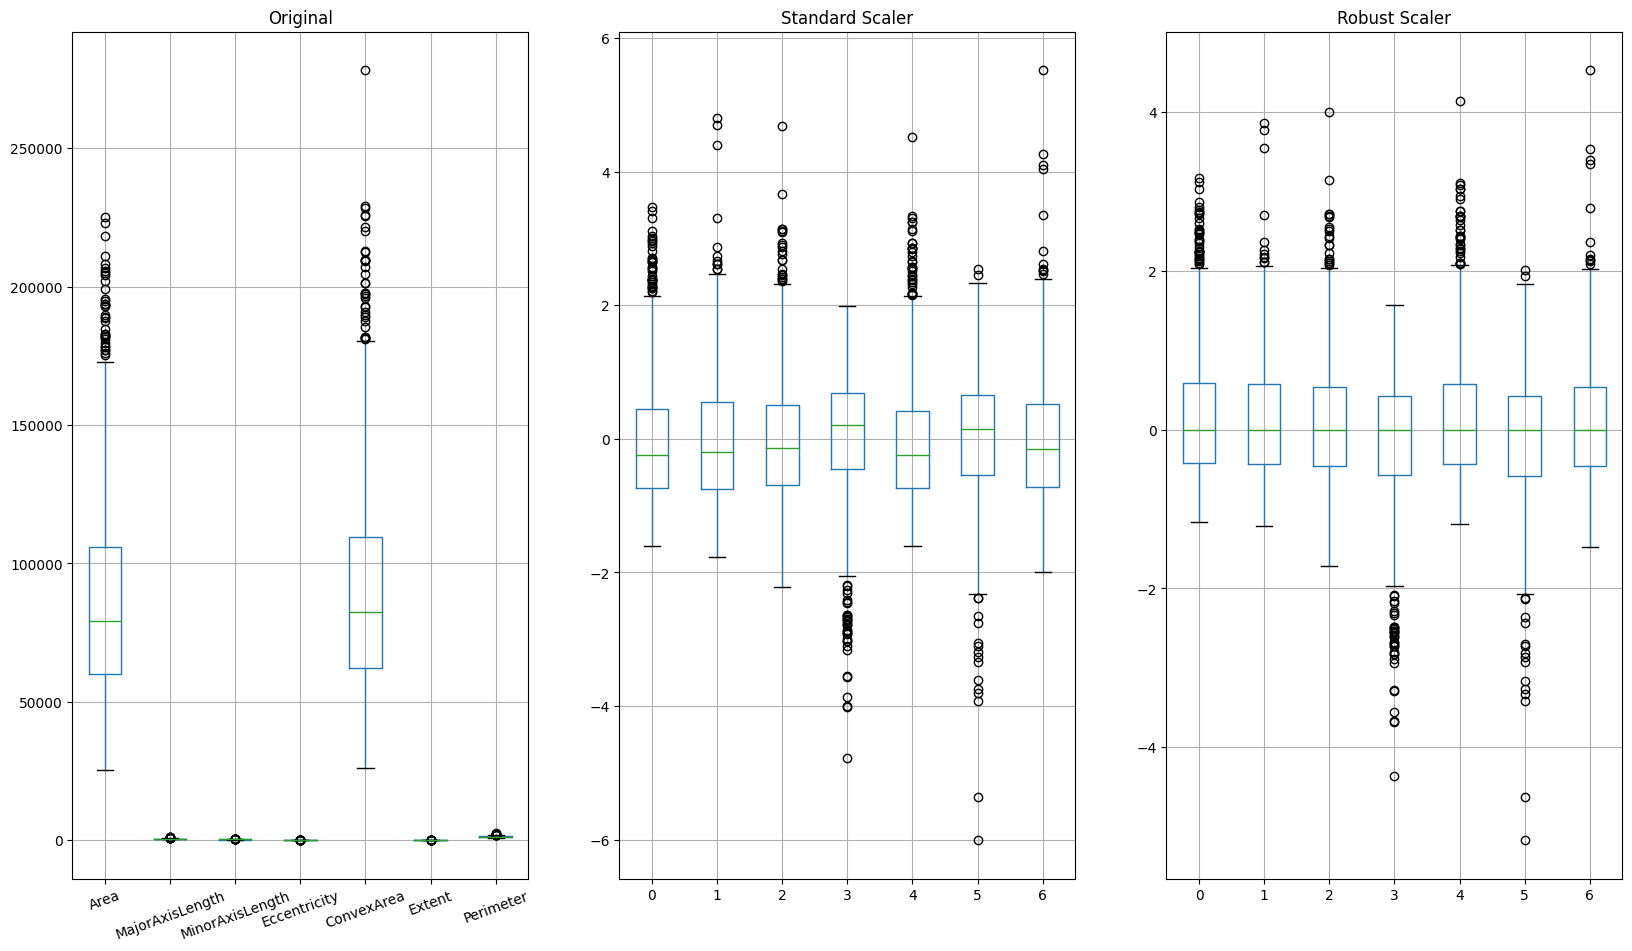

In [113]:
plt.figure(figsize=(20,11))
plt.subplot(1,3,1)
plt.title("Original")
print((pd.DataFrame(X_train)).boxplot())
plt.xticks(rotation=20)
plt.subplot(1,3,2)
plt.title("Standard Scaler")
print((pd.DataFrame(X_train_stdscaled)).boxplot())
plt.subplot(1,3,3)
plt.title("Robust Scaler")
print((pd.DataFrame(X_train_robscaled)).boxplot());

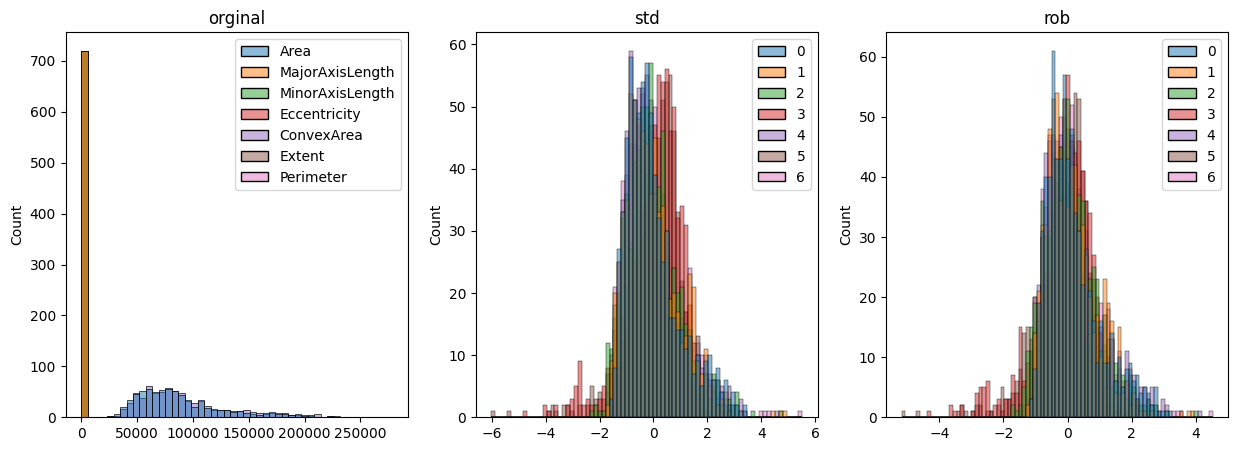

In [114]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("orginal")
sns.histplot(X_train)
plt.subplot(1,3,2)
plt.title("std")
sns.histplot(X_train_stdscaled)
plt.subplot(1,3,3)
plt.title("rob")
sns.histplot(X_train_robscaled);

# Logistic Regression


##### Model with Standard Scaler

In [115]:
operations_std = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model_std = Pipeline(steps=operations_std)

pipe_model_std.fit(X_train, y_train_01)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [116]:
y_pred=pipe_model_std.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0])

In [117]:
y_pred_proba=pipe_model_std.predict_proba(X_test)
y_pred_proba

array([[5.29647842e-01, 4.70352158e-01],
       [8.64479692e-01, 1.35520308e-01],
       [8.10730979e-01, 1.89269021e-01],
       [7.03574008e-01, 2.96425992e-01],
       [8.70277425e-01, 1.29722575e-01],
       [5.52003614e-01, 4.47996386e-01],
       [9.49895573e-01, 5.01044266e-02],
       [2.13104751e-01, 7.86895249e-01],
       [8.63536188e-01, 1.36463812e-01],
       [4.65477904e-01, 5.34522096e-01],
       [9.05403303e-02, 9.09459670e-01],
       [8.36943752e-01, 1.63056248e-01],
       [1.49816799e-03, 9.98501832e-01],
       [9.74175028e-01, 2.58249719e-02],
       [8.94740176e-01, 1.05259824e-01],
       [1.66858612e-04, 9.99833141e-01],
       [7.42771593e-01, 2.57228407e-01],
       [7.94679092e-01, 2.05320908e-01],
       [9.19148324e-01, 8.08516764e-02],
       [2.76179465e-01, 7.23820535e-01],
       [1.33977906e-01, 8.66022094e-01],
       [7.87361902e-01, 2.12638098e-01],
       [7.28703345e-01, 2.71296655e-01],
       [1.53707373e-01, 8.46292627e-01],
       [6.533173

In [118]:
data_test=pd.concat([X_test, y_test_01], axis=1)
data_test["pred"]=y_pred
data_test["pred_proba"]=y_pred_proba[:,1]
data_test

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
437,86141,414.107165,266.907528,0.764573,87883,0.718740,1146.164,0,0,0.470352
131,70788,362.650770,249.403725,0.725972,71954,0.746158,1003.769,0,0,0.135520
633,54357,362.594718,192.949367,0.846659,56006,0.699918,945.828,1,0,0.189269
195,87302,392.910117,284.179068,0.690568,89605,0.738246,1122.160,0,0,0.296426
230,54219,344.290832,204.496689,0.804491,56526,0.688495,931.430,0,0,0.129723
...,...,...,...,...,...,...,...,...,...,...
191,87036,384.969903,289.453901,0.659292,88336,0.727896,1094.590,0,0,0.220843
752,49691,336.678058,189.261667,0.827039,52077,0.724950,919.419,1,0,0.120841
94,52243,331.451147,206.759599,0.781583,55774,0.714434,934.547,0,0,0.105988
773,106938,498.433852,274.590275,0.834567,110118,0.773187,1285.854,1,1,0.870389


##### Model with Robust Scaler

In [119]:
operations_rob = [("scaler", RobustScaler()), ("logistic", LogisticRegression())]

pipe_model_rob = Pipeline(steps=operations_rob)

pipe_model_rob.fit(X_train, y_train_01)

Pipeline(steps=[('scaler', RobustScaler()), ('logistic', LogisticRegression())])

## Model Performance
*Checking the accuracy of the model using the train and test set by given eval_metric function.

##### Model Performance with Standard Scaler

In [120]:
def eval_metric(model, X_train, y_train_01, X_test, y_test_01):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test_01, y_pred))
    print(classification_report(y_test_01, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train_01, y_train_pred))
    print(classification_report(y_train_01, y_train_pred))

In [121]:
eval_metric(pipe_model_std, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[88  9]
 [13 70]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        97
           1       0.89      0.84      0.86        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[310  43]
 [ 56 311]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       353
           1       0.88      0.85      0.86       367

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



##### Model Performance with Robust Scaler

In [122]:
eval_metric(pipe_model_rob, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[89  8]
 [12 71]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        97
           1       0.90      0.86      0.88        83

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


Train_Set
[[312  41]
 [ 55 312]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       353
           1       0.88      0.85      0.87       367

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

##### CV with Standard Scaler

In [123]:
operations_std = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model_std = Pipeline(steps=operations_std)

scores = cross_validate(model_std, X_train, y_train_01, scoring = ['precision','recall','f1','accuracy'], # Class 1 scores max
                        cv = 10, return_train_score=True)
df_scores_std = pd.DataFrame(scores, index = range(1,11))
df_scores_std


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.003201,0.001693,0.846154,0.882911,0.891892,0.845455,0.868421,0.863777,0.861111,0.864198
2,0.002838,0.001627,0.891892,0.876582,0.891892,0.839394,0.891892,0.857585,0.888889,0.858025
3,0.002986,0.001901,0.804878,0.886435,0.891892,0.851515,0.846154,0.868624,0.833333,0.868827
4,0.002988,0.001635,0.882353,0.881250,0.810811,0.854545,0.845070,0.867692,0.847222,0.867284
5,0.002407,0.001403,0.900000,0.880878,0.729730,0.851515,0.805970,0.865948,0.819444,0.865741
6,0.002521,0.001419,0.914286,0.873817,0.864865,0.839394,0.888889,0.856260,0.888889,0.856481
7,0.002436,0.001411,0.944444,0.871473,0.918919,0.842424,0.931507,0.856703,0.930556,0.856481
8,0.002384,0.001610,0.900000,0.881620,0.750000,0.854985,0.818182,0.868098,0.833333,0.867284
9,0.002417,0.001652,0.783784,0.890966,0.805556,0.864048,0.794521,0.877301,0.791667,0.876543
10,0.002434,0.001383,0.914286,0.875000,0.888889,0.845921,0.901408,0.860215,0.902778,0.859568


In [124]:
df_scores_std.mean()[2:]    # Keçimen Scores


test_precision     0.878208
train_precision    0.880093
test_recall        0.844444
train_recall       0.848920
test_f1            0.859201
train_f1           0.864220
test_accuracy      0.859722
train_accuracy     0.864043
dtype: float64

##### CV with Robust Scaler

In [125]:
operations_rob = [("scaler", RobustScaler()), ("logistic", LogisticRegression())]

model_rob = Pipeline(steps=operations_rob)

scores = cross_validate(model_rob, X_train, y_train_01, scoring = ['precision','recall','f1','accuracy'], # Class 1 scores max
                        cv = 10, return_train_score=True)
df_scores_rob = pd.DataFrame(scores, index = range(1,11))
df_scores_rob

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.004107,0.001799,0.846154,0.885714,0.891892,0.845455,0.868421,0.865116,0.861111,0.865741
2,0.003413,0.001815,0.871795,0.882166,0.918919,0.839394,0.894737,0.860248,0.888889,0.861111
3,0.003451,0.001840,0.804878,0.883648,0.891892,0.851515,0.846154,0.867284,0.833333,0.867284
4,0.003323,0.001704,0.882353,0.881250,0.810811,0.854545,0.845070,0.867692,0.847222,0.867284
5,0.004199,0.001889,0.903226,0.884013,0.756757,0.854545,0.823529,0.869029,0.833333,0.868827
6,0.003506,0.001874,0.914286,0.880126,0.864865,0.845455,0.888889,0.862442,0.888889,0.862654
7,0.003293,0.002189,0.944444,0.871069,0.918919,0.839394,0.931507,0.854938,0.930556,0.854938
8,0.003567,0.001679,0.900000,0.884735,0.750000,0.858006,0.818182,0.871166,0.833333,0.870370
9,0.003434,0.001722,0.783784,0.896226,0.805556,0.861027,0.794521,0.878274,0.791667,0.878086
10,0.002924,0.001385,0.911765,0.880503,0.861111,0.845921,0.885714,0.862866,0.888889,0.862654


In [126]:
df_scores_rob.mean()[2:] 

test_precision     0.876268
train_precision    0.882945
test_recall        0.847072
train_recall       0.849526
test_f1            0.859672
train_f1           0.865906
test_accuracy      0.859722
train_accuracy     0.865895
dtype: float64

### GridSearchCV


##### GridSearchCV with Standard Scaler

In [127]:
operations_std = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model_std = Pipeline(steps=operations_std)
penalty = ["l1", "l2"]
C = np.logspace(-1,5,20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : [C,1],
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}


grid_model_std = GridSearchCV(estimator=model_std,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",   
                          n_jobs = -1,          
                          return_train_score=True)

In [128]:
np.logspace(-1,5,20)

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [129]:
grid_model_std.fit(X_train, y_train_01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                         1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='accuracy')

In [130]:
grid_model_std.best_params_

{'logistic__C': 1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [131]:
grid_model_std.cv_results_

{'mean_fit_time': array([0.00240707, 0.0014348 , 0.00123141, 0.00118794, 0.00127835,
        0.00105696, 0.00110295, 0.00114233, 0.00113926, 0.00107639,
        0.00102251, 0.00109599, 0.00107565, 0.00102849, 0.00097885,
        0.00114508, 0.00111959, 0.00228124, 0.00100973, 0.00629656,
        0.00410016, 0.00183706, 0.0060153 , 0.0057096 , 0.00150118,
        0.00245442, 0.00129955, 0.00680571, 0.00343902, 0.00200677,
        0.0053833 , 0.00542383]),
 'std_fit_time': array([5.82705767e-04, 1.60936214e-04, 1.09081722e-04, 1.13699078e-04,
        1.23332564e-04, 8.55520016e-05, 1.72889293e-04, 1.17509359e-04,
        1.80234455e-04, 1.35361717e-04, 9.47419787e-05, 1.71326551e-04,
        1.79933641e-04, 1.44451000e-04, 1.23833435e-04, 5.22179164e-04,
        1.52977151e-04, 2.50246776e-04, 2.38418924e-04, 5.00213475e-04,
        1.98295775e-03, 1.96774143e-04, 1.35615336e-03, 3.52334421e-04,
        8.92773930e-04, 2.66225881e-04, 1.18896649e-04, 1.37139470e-03,
        5.63172301e-0

In [132]:
grid_model_std.best_score_

0.8666666666666666

##### GridSearchCV with Robust Scaler

In [134]:
operations_rob = [("scaler", RobustScaler()), ("logistic", LogisticRegression())]

model_rob = Pipeline(steps=operations_rob)
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

grid_model_rob = GridSearchCV(estimator=model_rob,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",   
                          n_jobs = -1,          
                          return_train_score=True)

In [135]:
grid_model_rob.fit(X_train, y_train_01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='accuracy')

In [136]:
grid_model_rob.best_params_

{'logistic__C': 5,
 'logistic__class_weight': None,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [137]:
grid_model_rob.best_score_

0.8694444444444445

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)


##### ROC with Standard Scaler and Robust Scaler

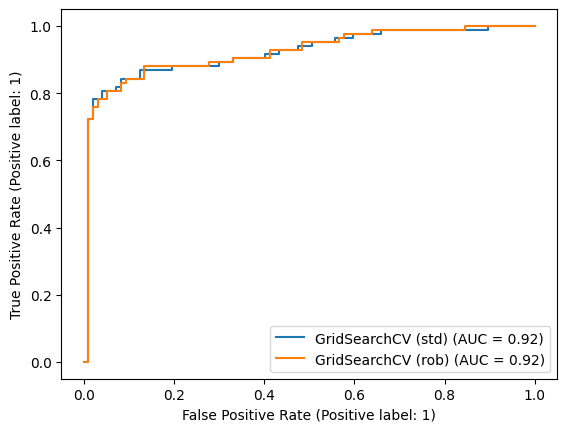

In [139]:
fig1, ax = plt.subplots(ncols=1, sharey=True)
l1=RocCurveDisplay.from_estimator(grid_model_std, X_test, y_test_01, ax=ax, name="GridSearchCV (std)")
l2=RocCurveDisplay.from_estimator(grid_model_rob, X_test, y_test_01, ax=ax, name="GridSearchCV (rob)");


##### Precision Recall Curve with Standard Scaler and Robust Scaler

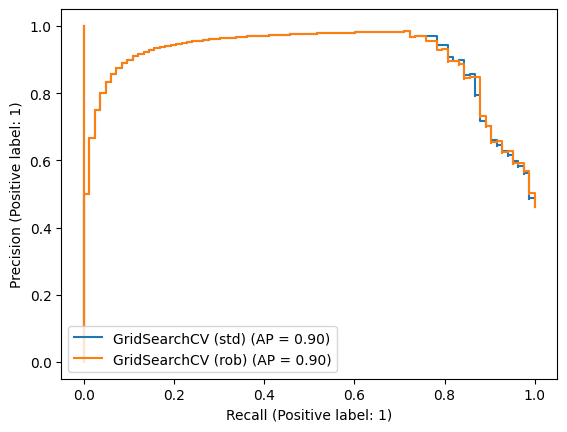

In [140]:
fig2, ax = plt.subplots(ncols=1, sharey=True)
PrecisionRecallDisplay.from_estimator(grid_model_std, X_test, y_test_01, ax=ax, name="GridSearchCV (std)")
PrecisionRecallDisplay.from_estimator(grid_model_rob, X_test, y_test_01, ax=ax, name="GridSearchCV (rob)");

In [141]:
eval_metric(pipe_model_std, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[88  9]
 [13 70]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        97
           1       0.89      0.84      0.86        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[310  43]
 [ 56 311]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       353
           1       0.88      0.85      0.86       367

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [142]:
eval_metric(grid_model_std, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[87 10]
 [13 70]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        97
           1       0.88      0.84      0.86        83

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[312  41]
 [ 55 312]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       353
           1       0.88      0.85      0.87       367

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [143]:
eval_metric(grid_model_rob, X_train, y_train_01, X_test, y_test_01)

Test_Set
[[88  9]
 [13 70]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        97
           1       0.89      0.84      0.86        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[313  40]
 [ 53 314]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       353
           1       0.89      0.86      0.87       367

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Conclusions
* Since data have marginal values, two scaling methods are used for comparison, including the Robust Scaler, which is more resistant to outliers. No significant difference was found between them, yet Robust Scaler results are slightly better on the confusion matrix.